In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ML Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv('dataset.csv')
df.head()


,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [3]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


<Axes: xlabel='price', ylabel='Count'>

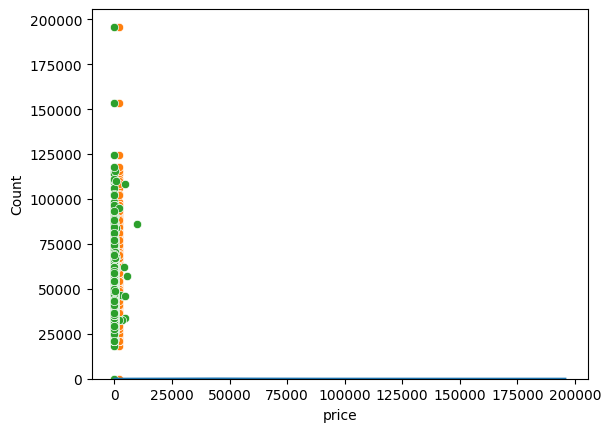

In [4]:
sns.histplot(df['price'], kde=True)

sns.scatterplot(x='year', y='price', data=df)

sns.scatterplot(x='mileage', y='price', data=df)



In [8]:
current_year = 2025
df['car_age'] = current_year - df['year']
df = df.drop('year', axis=1)


In [9]:
X = df.drop('price', axis=1)
y = df['price']

categorical_features = ['make', 'model', 'fuel', 'transmission', 'trim', 'body', 
                        'exterior_color', 'interior_color', 'drivetrain', 'engine']
numerical_features = ['mileage', 'cylinders', 'doors', 'car_age']


In [10]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [11]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Check for missing price values
print(df['price'].isnull().sum())

# Remove rows where price is NaN
df = df[df['price'].notnull()]


23


In [15]:
# Ensure no missing prices remain
assert df['price'].isnull().sum() == 0


In [17]:
# Check columns with missing values
missing = df.isnull().sum()
print(missing[missing > 0])



engine              2
cylinders         102
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     37
dtype: int64


In [18]:
# Fill categorical columns with 'Unknown'
categorical_cols = ['make', 'model', 'fuel', 'transmission', 'trim', 'body',
                    'exterior_color', 'interior_color', 'drivetrain', 'engine']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# Fill numerical columns with 0 (or median)
numerical_cols = ['mileage', 'cylinders', 'doors', 'car_age']
df[numerical_cols] = df[numerical_cols].fillna(0)


In [19]:
assert df.isnull().sum().sum() == 0


In [20]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['mileage', 'cylinders',
                                                   'doors', 'car_age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'model', 'fuel',
                                                   'transmission', 'trim',
                                                   'body', 'exterior_color',
                                                   'interior_color',
                                                   'drivetrain', 'engine'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [21]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")


Mean Absolute Error (MAE): 4670.572119310819
Mean Squared Error (MSE): 67689853.03200601
Root Mean Squared Error (RMSE): 8227.38433720013
R2 Score: 0.7783497507647608


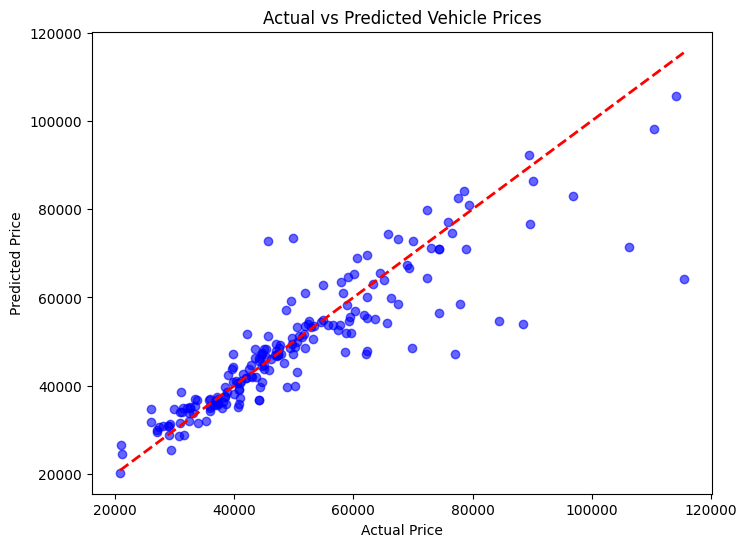

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Vehicle Prices')
plt.show()


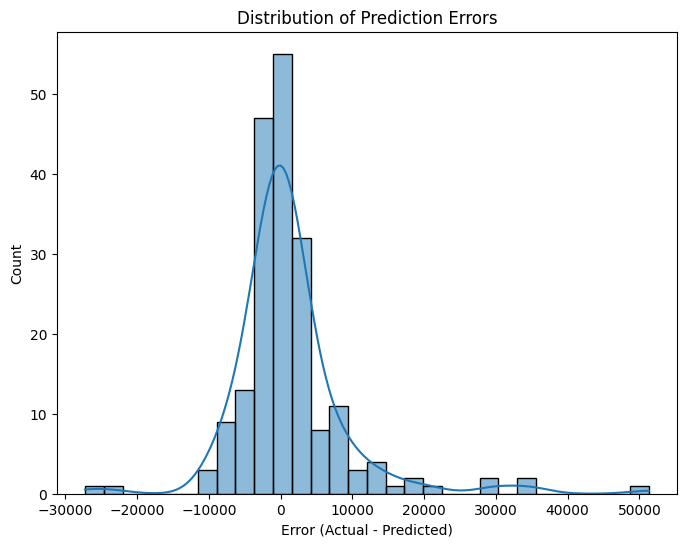

In [23]:
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (Actual - Predicted)')
plt.show()


In [24]:
import joblib
joblib.dump(model, 'vehicle_price_predictor.pkl')


['vehicle_price_predictor.pkl']

In [25]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('vehicle_price_predictor.pkl')

# Create sample vehicle details for prediction
vehicle_data = {
    'make': ['Toyota'],
    'model': ['Corolla'],
    'fuel': ['Gasoline'],
    'transmission': ['Automatic'],
    'trim': ['LE'],
    'body': ['Sedan'],
    'exterior_color': ['White'],
    'interior_color': ['Black'],
    'drivetrain': ['Front-wheel Drive'],
    'engine': ['1.8L I4'],
    'mileage': [35000],
    'cylinders': [4],
    'doors': [4],
    'car_age': [5]
}

# Convert to DataFrame
input_df = pd.DataFrame(vehicle_data)

# Predict the price
predicted_price = model.predict(input_df)

# Output the result
print(f"Predicted Vehicle Price: ${predicted_price[0]:,.2f}")


Predicted Vehicle Price: $25,389.68


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and y_pred are already defined:
# y_test = actual prices (from test data)
# y_pred = predicted prices (from model.predict)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 4670.57
Mean Squared Error (MSE): 67689853.03
Root Mean Squared Error (RMSE): 8227.38
R2 Score: 0.78
